In [18]:
import timeit
from random import randint

import numpy
import matplotlib.pyplot as plt

from ListWrapper import ListWrapper
from fuzzy_number import FuzzyNumber

In [19]:
random_list = [FuzzyNumber(randint(0, 100), randint(0, 100), randint(0, 100)) for _ in range(100)]

In [20]:
list_wrapper = ListWrapper(random_list)
list_wrapper

[(1710214597542179856961059314670734159, 14 31 10), (1710214676770342369368506486854486863, 50 63 62), (1710214755998504883038931879538953039, 1 10 55), (1710214835226667398251277194644392783, 82 87 7), (1710214914454829912191074140040956751, 100 51 54), (1710214993682992429311819797244644175, 94 47 33), (1710215072911154940501043270224677711, 5 75 38), (1710215152139317456753438624275991375, 41 50 15), (1710215231367479970821588159052614479, 21 12 28), (1710215310595642484604603542421343055, 88 6 50), (1710215389823805001612759208940768079, 66 13 6), (1710215469051967514995235700450233167, 99 91 9), (1710215548280130026706032305275112271, 94 11 6), (1710215627508292543052158826571074383, 34 97 93), (1710215706736455058730626703109360463, 43 29 19), (1710215785964617569540984857436851023, 6 46 66), (1710215865192780087247198466198702927, 30 61 27), (1710215944420942599475909028171189071, 92 46 25), (1710216023649105114773822736196668239, 19 61 76), (171021610287726762850392082394379348

In [21]:
ID = list_wrapper[randint(0, 100)][0]
ID

1710218321265818027418984683418389327

In [22]:
print(list_wrapper.find(ID))
ID in list_wrapper

47


True

In [23]:
element = FuzzyNumber(0, 0, 0)
list_wrapper.insert(element)
list_wrapper

[(1710214597542179856961059314670734159, 14 31 10), (1710214676770342369368506486854486863, 50 63 62), (1710214755998504883038931879538953039, 1 10 55), (1710214835226667398251277194644392783, 82 87 7), (1710214914454829912191074140040956751, 100 51 54), (1710214993682992429311819797244644175, 94 47 33), (1710215072911154940501043270224677711, 5 75 38), (1710215152139317456753438624275991375, 41 50 15), (1710215231367479970821588159052614479, 21 12 28), (1710215310595642484604603542421343055, 88 6 50), (1710215389823805001612759208940768079, 66 13 6), (1710215469051967514995235700450233167, 99 91 9), (1710215548280130026706032305275112271, 94 11 6), (1710215627508292543052158826571074383, 34 97 93), (1710215706736455058730626703109360463, 43 29 19), (1710215785964617569540984857436851023, 6 46 66), (1710215865192780087247198466198702927, 30 61 27), (1710215944420942599475909028171189071, 92 46 25), (1710216023649105114773822736196668239, 19 61 76), (171021610287726762850392082394379348

In [24]:
del list_wrapper[-1]
list_wrapper

[(1710214597542179856961059314670734159, 14 31 10), (1710214676770342369368506486854486863, 50 63 62), (1710214755998504883038931879538953039, 1 10 55), (1710214835226667398251277194644392783, 82 87 7), (1710214914454829912191074140040956751, 100 51 54), (1710214993682992429311819797244644175, 94 47 33), (1710215072911154940501043270224677711, 5 75 38), (1710215152139317456753438624275991375, 41 50 15), (1710215231367479970821588159052614479, 21 12 28), (1710215310595642484604603542421343055, 88 6 50), (1710215389823805001612759208940768079, 66 13 6), (1710215469051967514995235700450233167, 99 91 9), (1710215548280130026706032305275112271, 94 11 6), (1710215627508292543052158826571074383, 34 97 93), (1710215706736455058730626703109360463, 43 29 19), (1710215785964617569540984857436851023, 6 46 66), (1710215865192780087247198466198702927, 30 61 27), (1710215944420942599475909028171189071, 92 46 25), (1710216023649105114773822736196668239, 19 61 76), (171021610287726762850392082394379348

In [25]:
def speed_test_find(start: int, end: int, step: int):
    speed_measurements = []

    for _ in range(start, end, step):
        random_list = [
            FuzzyNumber(randint(0, 100), randint(0, 100), randint(0, 100))
            for _ in range(10000)
        ]
        list_wrapper = ListWrapper(random_list)
        ID = list_wrapper[randint(0, len(list_wrapper))][0]

        speed_measurements.append(
            timeit.Timer(lambda: list_wrapper.find(ID)).repeat()
        )

    return speed_measurements

In [26]:
def speed_test_del(start: int, end: int, step: int):
    speed_measurements = []

    for _ in range(start, end, step):
        random_list = [
            FuzzyNumber(randint(0, 100), randint(0, 100), randint(0, 100))
            for _ in range(10000)
        ]
        list_wrapper = ListWrapper(random_list)

        speed_measurements.append(
            timeit.Timer(
                lambda: list_wrapper.__delitem__(len(list_wrapper) // 2)
            ).repeat(len(random_list), 1)
        )

    return speed_measurements

In [27]:
def speed_test_insert(start: int, end: int, step: int):
    speed_measurements = []

    for _ in range(start, end, step):
        random_list = [
            FuzzyNumber(randint(0, 100), randint(0, 100), randint(0, 100))
            for _ in range(10000)
        ]
        list_wrapper = ListWrapper(random_list)

        element = FuzzyNumber(0, 0, 0)

        speed_measurements.append(
            timeit.Timer(lambda: list_wrapper.insert(element)).repeat()
        )

    return speed_measurements

In [28]:
def speed_test_contain(start: int, end: int, step: int):
    speed_measurements = []

    for _ in range(start, end, step):
        random_list = [
            FuzzyNumber(randint(0, 100), randint(0, 100), randint(0, 100))
            for _ in range(10000)
        ]
        list_wrapper = ListWrapper(random_list)

        speed_measurements.append(
            timeit.Timer(lambda: list_wrapper.__contains__(ID)).repeat()
        )

    return speed_measurements

In [29]:
SIZE = (1000, 11_000, 1000)

In [30]:
del_array = speed_test_del(SIZE[0], SIZE[1], SIZE[2])
find_array = speed_test_find(SIZE[0], SIZE[1], SIZE[2])
insert_array = speed_test_insert(SIZE[0], SIZE[1], SIZE[2])
contain_array = speed_test_contain(SIZE[0], SIZE[1], SIZE[2])

In [31]:
numpy_contain = numpy.array(contain_array)
numpy_insert = numpy.array(insert_array)
numpy_del = numpy.array(del_array)
numpy_find = numpy.array(find_array)

In [32]:
mean_contain = numpy.mean(numpy_contain, axis=1)
mean_insert = numpy.mean(numpy_insert, axis=1)
mean_find = numpy.mean(numpy_find, axis=1)
mean_del = numpy.mean(numpy_del, axis=1)

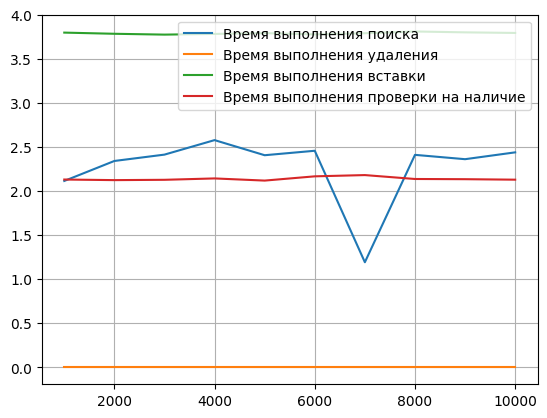

In [33]:
ax = plt.subplot()

x_line = range(SIZE[0], SIZE[1], SIZE[2])

ax.plot(x_line, mean_find, label="Время выполнения поиска")
ax.plot(x_line, mean_del, label="Время выполнения удаления")
ax.plot(x_line, mean_insert, label="Время выполнения вставки")
ax.plot(x_line, mean_contain, label="Время выполнения проверки на наличие")

ax.legend()
ax.grid()